ASSIGNMENT-5

In [ ]:
from matplotlib import pyplot
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import seaborn as sns

In [ ]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
def showImages(num_row,num_col,X,Y):
    import matplotlib.pyplot as plt
    %matplotlib inline

    from sklearn.utils import shuffle
    (X_rand, Y_rand) = shuffle(X, Y)

    fig, axes = plt.subplots(num_row,num_col,figsize = (12,12))
    axes = axes.ravel()
    for i in range(0, num_row*num_col):
        axes[i].imshow(X_rand[i])
        axes[i].set_title("{}".format(labels[Y_rand.item(i)]))
        axes[i].axis('off')
        plt.subplots_adjust(wspace =1)

    return

In [ ]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [ ]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

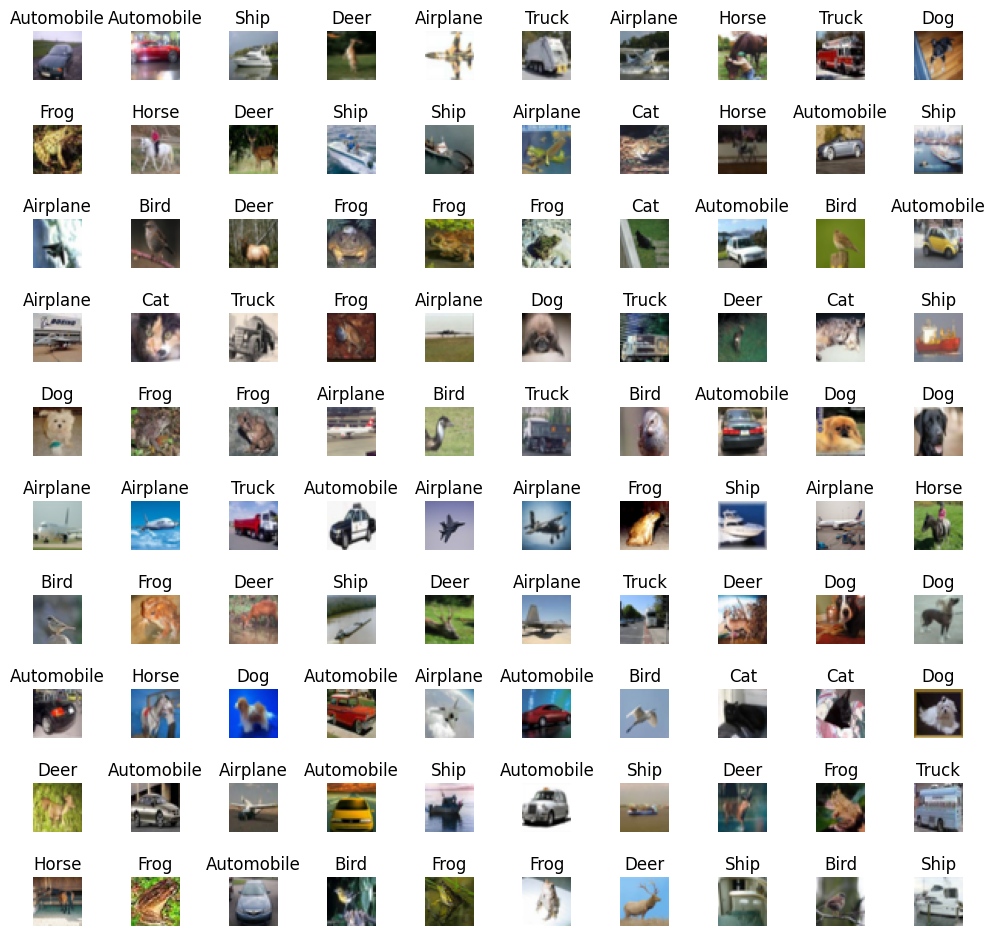

In [ ]:
r = 10
c = 10
showImages(r,c,X =x_train,Y = y_train)

In [ ]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = False

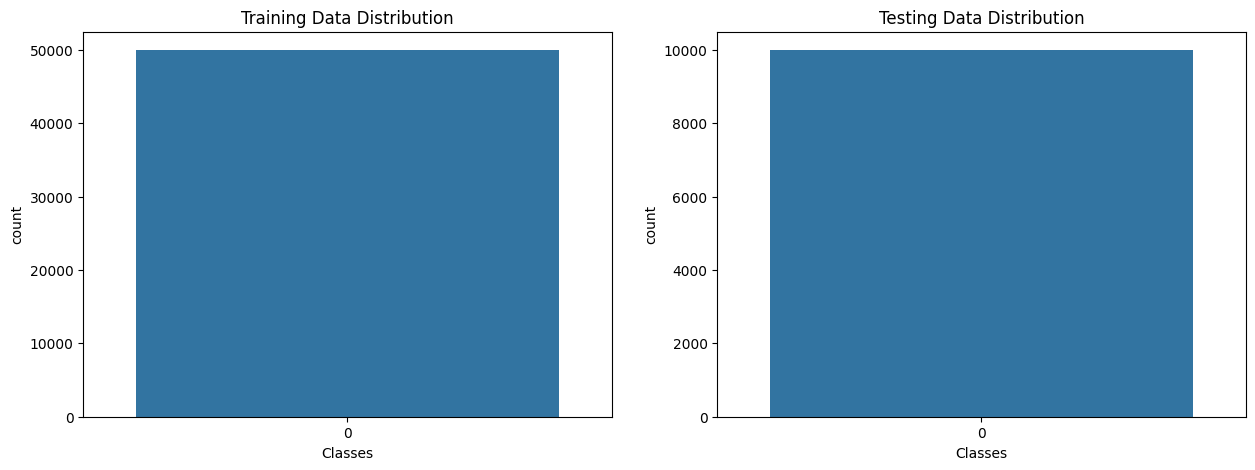

In [ ]:
fig,axs = pyplot.subplots(1,2,figsize=(15,5))

sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Training Data Distribution')
axs[0].set_xlabel('Classes')

sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Testing Data Distribution')
axs[1].set_xlabel('Classes')
pyplot.show()

In [ ]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [ ]:
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

ASSIGNMENT-6

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
consumer = pd.read_csv('/content/connsumerComplaintsSmall.csv')

In [ ]:
consumer.head()

Unnamed: 0 Date received  \
0           1    21-11-2022   
1           2    21-11-2022   
2           3    21-11-2022   
3           4    21-11-2022   
4           5    15-11-2022   

                                             Product  \
0                                           Mortgage   
1  Credit reporting, credit repair services, or o...   
2  Credit reporting, credit repair services, or o...   
3  Credit reporting, credit repair services, or o...   
4  Credit reporting, credit repair services, or o...   

                  Sub-product  \
0  Conventional home mortgage   
1            Credit reporting   
2            Credit reporting   
3            Credit reporting   
4            Credit reporting   

                                               Issue  \
0                         Struggling to pay mortgage   
1                        Improper use of your report   
2                        Improper use of your report   
3  Problem with a credit reporting company's inve...   
4               Incorrect information on your report   

                                           Sub-issue  \
0                                                NaN   
1      Reporting company used your report improperly   
2      Reporting company used your report improperly   
3  Their investigation did not fix an error on yo...   
4                Information belongs to someone else   

  Consumer complaint narrative  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN

In [ ]:
consumer.columns

Index(['Unnamed: 0', 'Date received', 'Product', 'Sub-product', 'Issue',
       'Sub-issue', 'Consumer complaint narrative'],
      dtype='object')

In [ ]:
consumer.describe()

Unnamed: 0
count  101.000000
mean    51.000000
std     29.300171
min      1.000000
25%     26.000000
50%     51.000000
75%     76.000000
max    101.000000

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
texts = consumer['Consumer complaint narrative'].fillna('')
labels = consumer['Product']

In [ ]:
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
sequences_padded = pad_sequences(sequences, maxlen=max_len)


In [ ]:
label_to_index = {label: index for index, label in enumerate(set(labels))}
labels_encoded = [label_to_index[label] for label in labels]
labels_categorical = to_categorical(labels_encoded)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sequences_padded, labels_categorical, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Embedding(max_words, 64, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(len(label_to_index), activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
2/2 [==============================] - 3s 767ms/step - loss: 1.9169 - accuracy: 0.8056 - val_loss: 1.8917 - val_accuracy: 0.6250
Epoch 2/10
2/2 [==============================] - 0s 135ms/step - loss: 1.8512 - accuracy: 0.8194 - val_loss: 1.8455 - val_accuracy: 0.6250
Epoch 3/10
2/2 [==============================] - 0s 169ms/step - loss: 1.7753 - accuracy: 0.8194 - val_loss: 1.7873 - val_accuracy: 0.6250
Epoch 4/10
2/2 [==============================] - 0s 157ms/step - loss: 1.6772 - accuracy: 0.8194 - val_loss: 1.7057 - val_accuracy: 0.6250
Epoch 5/10
2/2 [==============================] - 0s 165ms/step - loss: 1.5344 - accuracy: 0.8194 - val_loss: 1.5885 - val_accuracy: 0.6250
Epoch 6/10
2/2 [==============================] - 0s 170ms/step - loss: 1.3114 - accuracy: 0.8194 - val_loss: 1.4580 - val_accuracy: 0.6250
Epoch 7/10
2/2 [==============================] - 0s 176ms/step - loss: 1.0015 - accuracy: 0.8194 - val_loss: 1.5399 - val_accuracy: 0.6250
Epoch 8/10
2/2 [====

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", accuracy)

1/1 [==============================] - 0s 47ms/step - loss: 1.1941 - accuracy: 0.7619
Test accuracy: 0.761904776096344


ASSIGNMENT-7

In [ ]:
train_data = pd.read_csv('/content/emotion-labels-train.csv')

In [ ]:
test_data = pd.read_csv('/content/emotion-labels-test.csv')

In [ ]:
train_data.head()

text label
0  Just got back from seeing @GaryDelaney in Burs...   joy
1  Oh dear an evening of absolute hilarity I don'...   joy
2  Been waiting all week for this game ❤️❤️❤️ #ch...   joy
3  @gardiner_love : Thank you so much, Gloria! Yo...   joy
4  I feel so blessed to work with the family that...   joy

In [ ]:
X_train = train_data['text']
y_train = train_data['label']
X_test = test_data['text']
y_test = test_data['label']

In [ ]:
import numpy as np

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
emotions = set(y_train)
num_classes = len(emotions)
label_to_index = {label: index for index, label in enumerate(emotions)}


In [ ]:
y_train = np.array([label_to_index[label] for label in y_train])
y_test = np.array([label_to_index[label] for label in y_test])

In [ ]:
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len)

In [ ]:
model = Sequential()
model.add(Embedding(max_words, 64, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(len(label_to_index), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
loss, accuracy = model.evaluate(X_test_padded, y_test)
print("Test accuracy:", accuracy)

99/99 [==============================] - 3s 19ms/step - loss: 1.3857 - accuracy: 0.2673
Test accuracy: 0.2673456370830536
